In [49]:
import numpy as np                 # For numerical operations (especially arrays/matrices)
import pandas as pd                # For data manipulation (loading, cleaning, etc.)
import matplotlib.pyplot as plt     # For data visualization (plotting graphs)
from sklearn.model_selection import train_test_split  # For splitting dataset into train/test sets
from sklearn.linear_model import LinearRegression      # For the linear regression model
from sklearn.metrics import mean_squared_error, r2_score # For model evaluation metrics


In [51]:
df = pd.read_csv('BostonHousing.csv') 
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [53]:
# Checking for missing values in the dataset
print(df.isnull().sum())

# Optional: Handle missing data (e.g., fill or drop)
df.fillna(df.mean(), inplace=True)  # Replace missing values with the column mean (for numerical columns)

# Display summary statistics (mean, std, etc.)
print(df.describe())


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio          

In [55]:
X = df.drop('medv', axis=1)  # Features (inputs) are all columns except the target column
y = df['medv']               # Target variable (output) is the target column


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


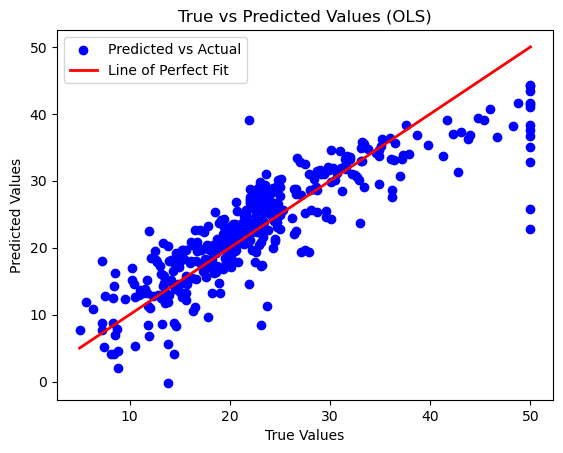

In [59]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Add a constant to the independent variable
X_train = sm.add_constant(X_train)

# Fit the OLS model
model = sm.OLS(y_train, X_train).fit()

# Predict the values
y_pred = model.predict(X_train)

# Plot the actual vs predicted values
plt.scatter(y_train, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', lw=2, label='Line of Perfect Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (OLS)')
plt.legend()
plt.show()